In [1]:
#HR Analytics: Job Change of Data Scientists
#Enkhchimeg Tsendnyam

#Background
#A company which is active in Big Data and Data Science wants to hire data scientists among 
#people who successfully pass some courses which conduct by the company. 
#Many people signup for their training. 
#Company wants to know which of these candidates are really wants to work for the company after training 
#or looking for a new employment because it helps to reduce the cost and time 
#as well as the quality of training or planning the courses and categorization of candidates. 
#Information related to demographics, education, experience are in hands from candidates signup and enrollment.

#Problems to Solve
#Predict the probability of a candidate to look for a new job
#Predict the probability of a candidate will work for the company



#Features
#enrollee_id : Unique ID for candidate
#city: City code
#city_ development _index : Developement index of the city (scaled)
#gender: Gender of candidate
#relevent_experience: Relevant experience of candidate
#enrolled_university: Type of University course enrolled if any
#education_level: Education level of candidate
#major_discipline :Education major discipline of candidate
#experience: Candidate total experience in years
#company_size: No of employees in current employer's company
#company_type : Type of current employer
#lastnewjob: Difference in years between previous job and current job
#training_hours: training hours completed
#target: 0 – Not looking for job change, 1 – Looking for a job change

In [2]:
#ORIGINAL CASE STUYY - PART 1

#Import all the necessary libraries
import pandas as pd
import yellowbrick
import numpy as np
import string
import re
import matplotlib.pyplot as plt #importing matplotlib to be do a visualization
from collections import Counter
import seaborn as sns
import seaborn as sn
%matplotlib inline

In [3]:
#Step 1:  Load data into a dataframe
data = pd.read_csv("/Users/Chimpukh/Documents/DSC550/aug_train.csv")

In [4]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (19158, 14)


In [5]:
#Step 3: Display the data first 5 rows using head()
print(data.head(5))

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

In [6]:
#Step 4:  what type of variables are in the table; describe the data using describe()
print("Describe Data")
print(data.describe())

Describe Data
        enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000


In [7]:
#Step 5: #pulls out the objects dtypes attributes
#show their count/frequency/max/quartiles
print("Summarized Data")
print(data.describe(include=['O']))

Summarized Data
            city gender      relevent_experience enrolled_university  \
count      19158  14650                    19158               18772   
unique       123      3                        2                   3   
top     city_103   Male  Has relevent experience       no_enrollment   
freq        4355  13221                    13792               13817   

       education_level major_discipline experience company_size company_type  \
count            18698            16345      19093        13220        13018   
unique               5                6         22            8            6   
top           Graduate             STEM        >20        50-99      Pvt Ltd   
freq             11598            14492       3286         3083         9817   

       last_new_job  
count         18735  
unique            6  
top               1  
freq           8040  


In [8]:
# set up the figure size (20 for the y axis & 10 for the x axis)
plt.rcParams['figure.figsize'] = (20, 10)

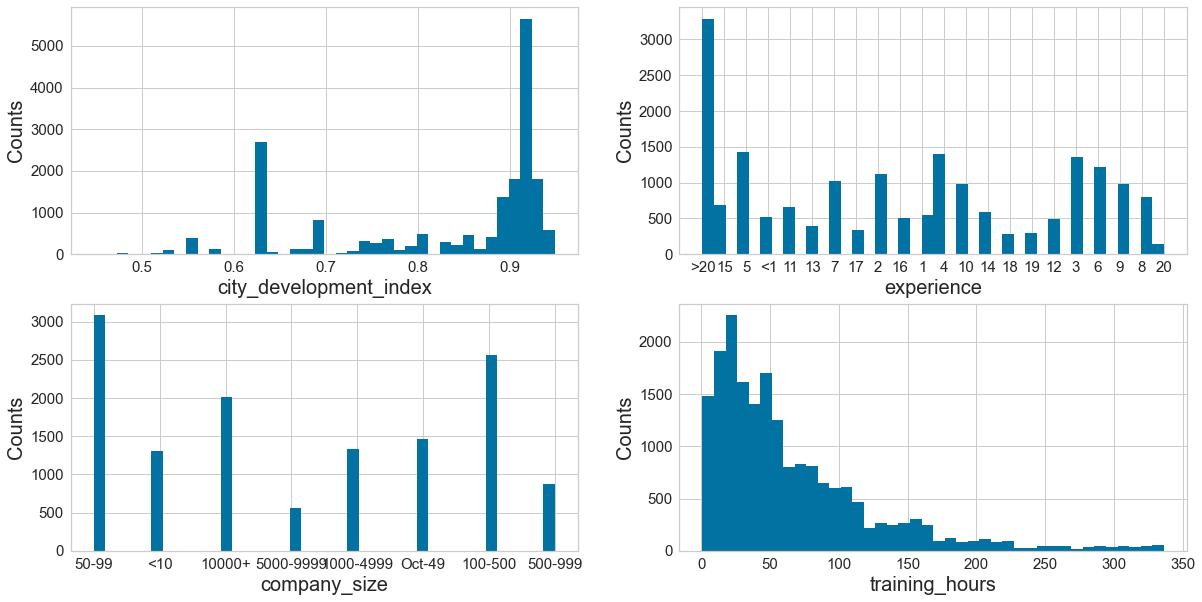

In [9]:
#Histograms to show the frequency of quantative variables
# make subplots 2 in columns & 2 in rows
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest (pick the columns to be analyzed)
num_features = ['city_development_index', 'experience', 'company_size', 'training_hours']
xaxes = num_features #put the chosen features into x axis 
yaxes = ['Counts', 'Counts', 'Counts', 'Counts'] #count the values of chosen features
# draw histograms
axes = axes.ravel() #return only axes
for idx, ax in enumerate(axes): #write enumerate() in a loop to count the iterable object
    ax.hist(data[num_features[idx]].dropna(), bins=40) #plot histogram using the chosen features 
    ax.set_xlabel(xaxes[idx], fontsize=20)#set the x label with the fontsize
    ax.set_ylabel(yaxes[idx], fontsize=20) #set the y label with the fontsize
    ax.tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
plt.show()  #show the plot

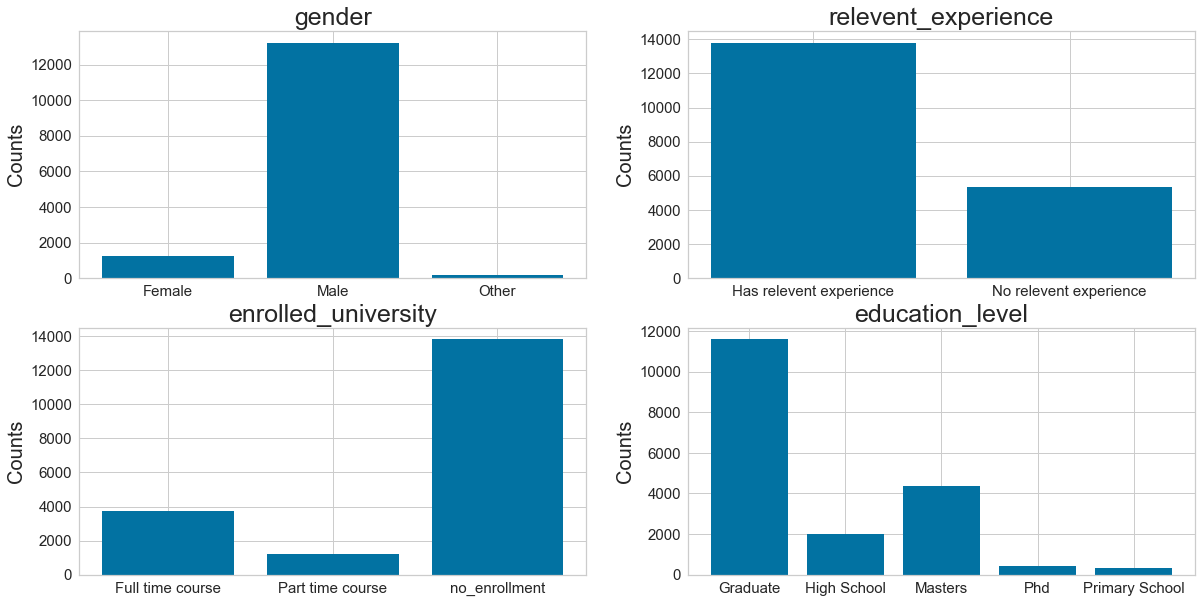

In [10]:
#Barcharts to show the frequency of categorical variables
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10) # set up the figure size (20 for the y axis & 10 for th x axis)
# make subplots 2 in columns & 2 in rows
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visulizer
X_gender = data.replace({'gender': {1: 'yes', 0: 'no'}}).groupby('gender').size().reset_index(name='Counts')['gender']
Y_gender = data.replace({'gender': {1: 'yes', 0: 'no'}}).groupby('gender').size().reset_index(name='Counts')['Counts']
# make the bar plot for "gender" column
axes[0, 0].bar(X_gender, Y_gender) #Plot the x & y 
axes[0, 0].set_title('gender', fontsize=25) #set the x label with the fontsize
axes[0, 0].set_ylabel('Counts', fontsize=20)  #set the y label with the fontsize
axes[0, 0].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
# make the data read to feed into the visulizer
X_relevent_experience = data.replace({'relevent_experience': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('relevent_experience').size().reset_index(name='Counts')['relevent_experience']
Y_relevent_experience = data.replace({'relevent_experience': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('relevent_experience').size().reset_index(name='Counts')['Counts']
# make the bar plot for "relevent_experience" column 
axes[0, 1].bar(X_relevent_experience, Y_relevent_experience) #Plot the x & y 
axes[0, 1].set_title('relevent_experience', fontsize=25) #set the x label with the fontsize
axes[0, 1].set_ylabel('Counts', fontsize=20)  #set the y label with the fontsize
axes[0, 1].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
# make the data read to feed into the visulizer
X_enrolled_university = data.groupby('enrolled_university').size().reset_index(name='Counts')['enrolled_university']
Y_enrolled_university = data.groupby('enrolled_university').size().reset_index(name='Counts')['Counts']
# make the bar plot for "Sex" column 
axes[1, 0].bar(X_enrolled_university, Y_enrolled_university) #Plot the x & y 
axes[1, 0].set_title('enrolled_university', fontsize=25) #set the x label with the fontsize
axes[1, 0].set_ylabel('Counts', fontsize=20)  #set the y label with the fontsize
axes[1, 0].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
# make the data read to feed into the visulizer
X_education_level = data.groupby('education_level').size().reset_index(name='Counts')['education_level']
Y_education_level = data.groupby('education_level').size().reset_index(name='Counts')['Counts']
# make the bar plot for "education_level" column
axes[1, 1].bar(X_education_level , Y_education_level) #Plot the x & y 
axes[1, 1].set_title('education_level', fontsize=25) #set the x label with the fontsize
axes[1, 1].set_ylabel('Counts', fontsize=20)  #set the y label with the fontsize
axes[1, 1].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
plt.show() #show the plot

                        enrollee_id  city_development_index  training_hours  \
enrollee_id                1.000000               -0.040455        0.000998   
city_development_index    -0.040455                1.000000        0.001920   
training_hours             0.000998                0.001920        1.000000   
target                     0.049475               -0.341665       -0.021577   

                          target  
enrollee_id             0.049475  
city_development_index -0.341665  
training_hours         -0.021577  
target                  1.000000  


<AxesSubplot:>

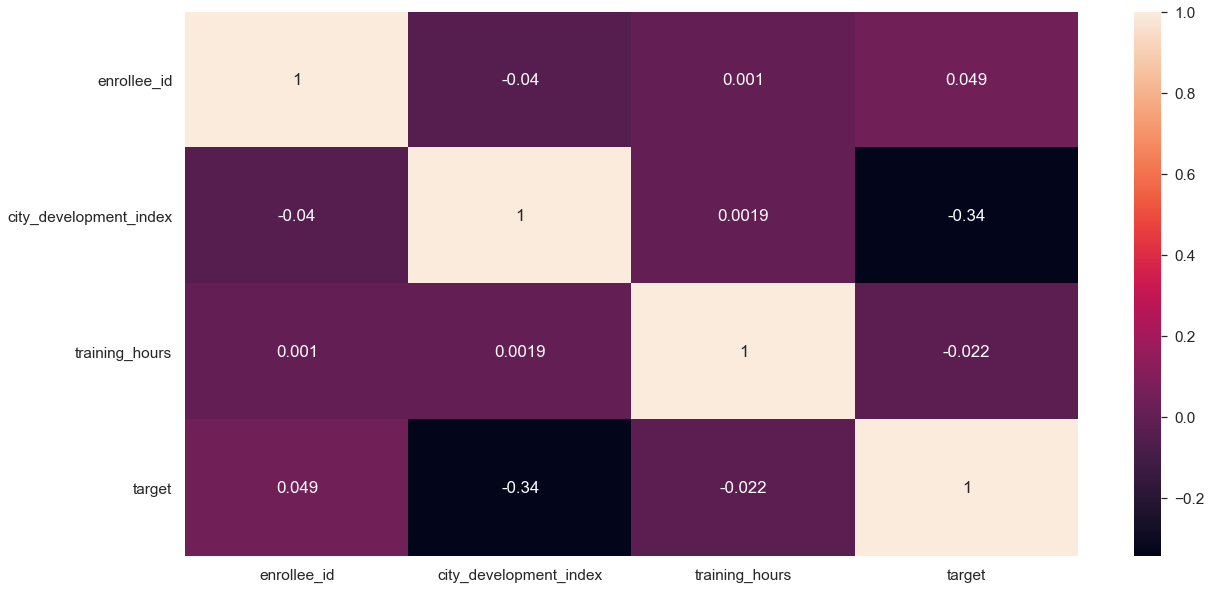

In [11]:
#Correlation matrix to see if there is any correlations
df1 = pd.DataFrame(data)
corrMatrix = df1.corr()
print (corrMatrix)
sns.set(font_scale=1.4) 
sn.heatmap(corrMatrix, annot=True) 

In [12]:
#Stacked Bar Plot to show the

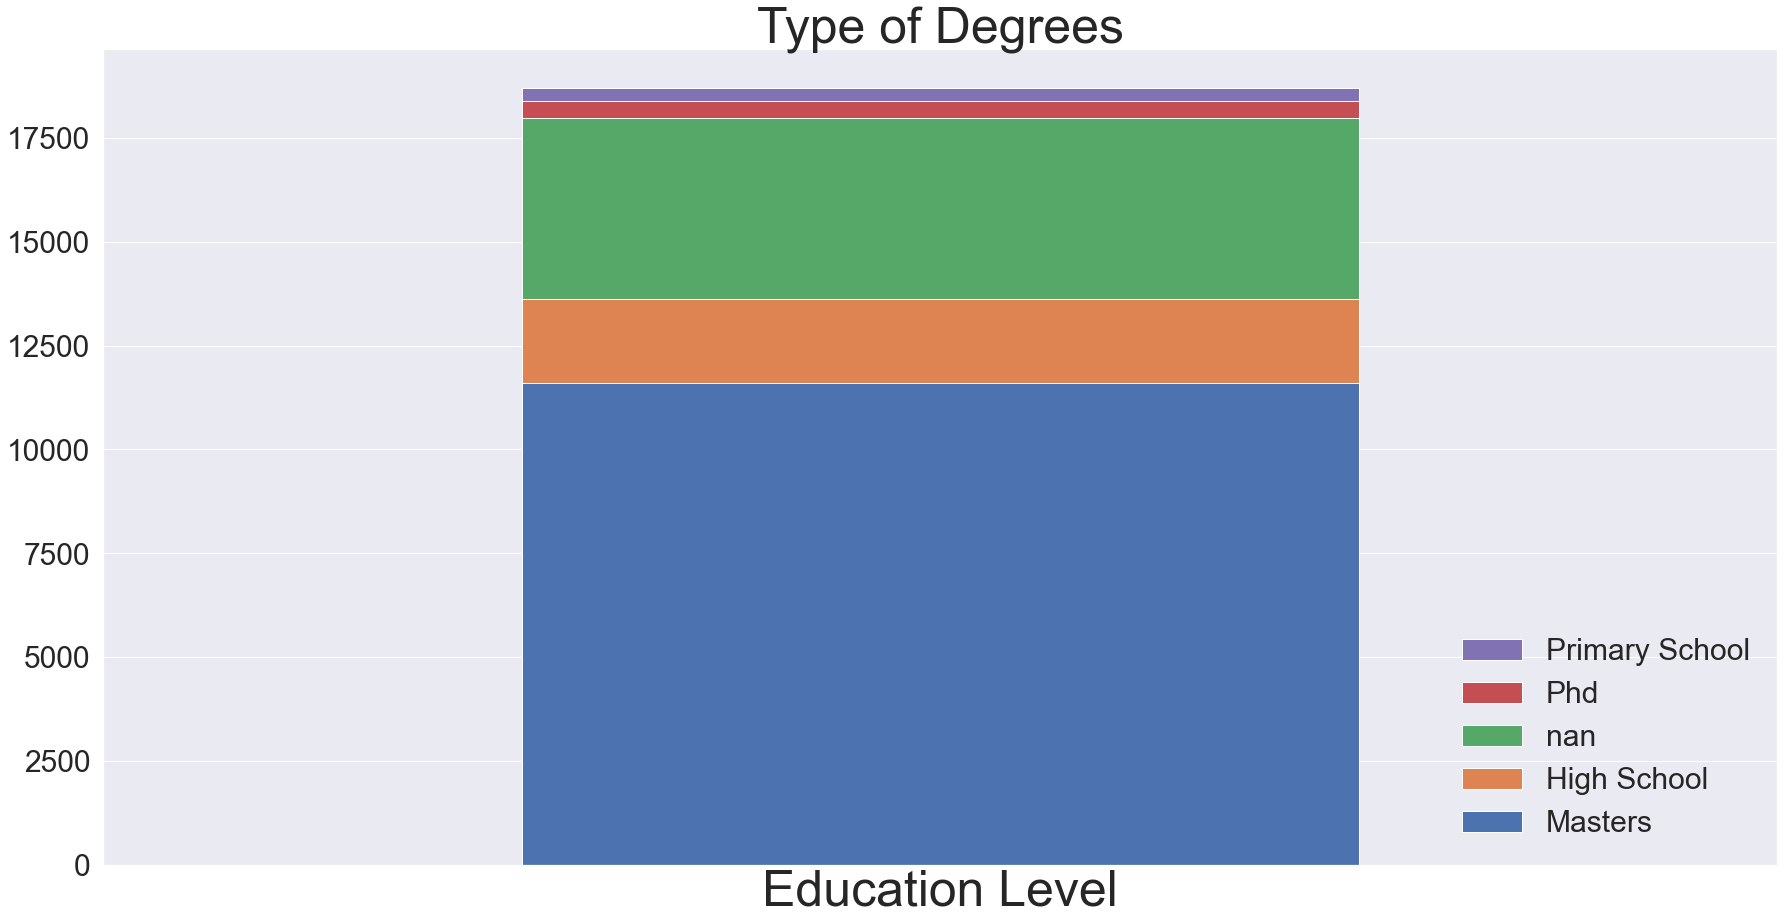

In [13]:
#Stacked Bar Plot to show the type of degrees that participants have
plt.rcParams['figure.figsize'] = (30, 15)
data.assign(dummy = 1).groupby(['dummy','education_level']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.title('Type of Degrees',fontsize=50 )
plt.xlabel('Education Level', fontsize=50)
plt.xticks([])
plt.tick_params(axis='both', labelsize=30) 
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
labels = reversed(data['education_level'].unique())
plt.legend(reversed_handles,labels,loc='lower right', fontsize=30)
plt.grid(True)
plt.show()

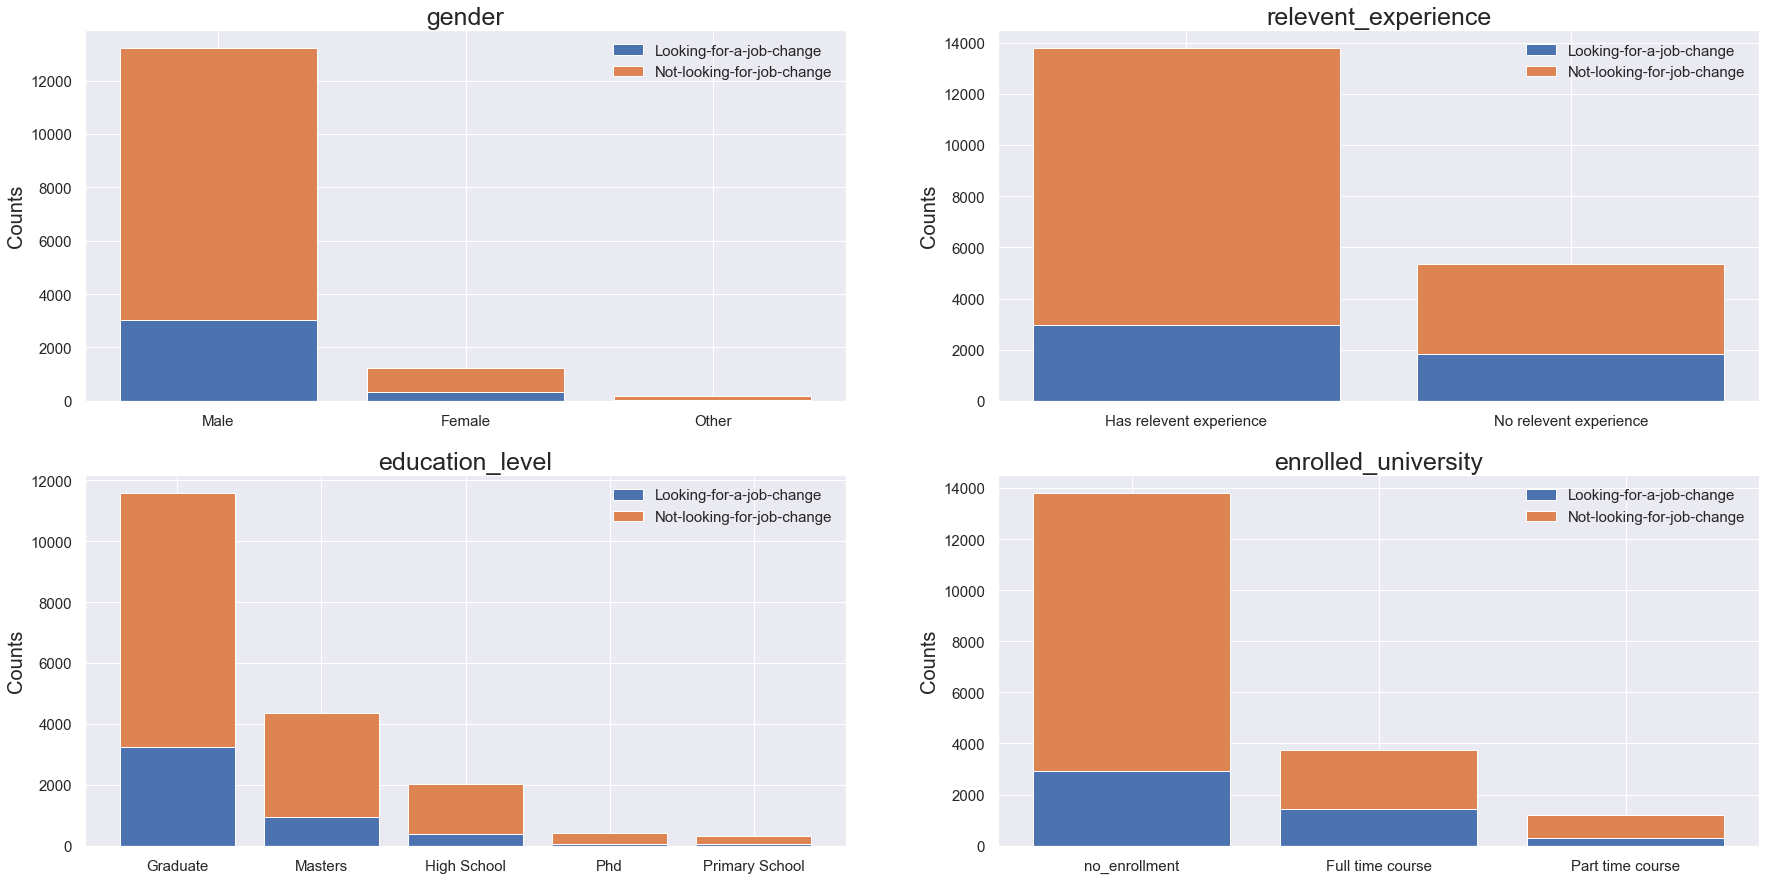

In [35]:
# make subplots 2 in columns & 2 in rows
fig, axes = plt.subplots(nrows = 2, ncols = 2)


# make the data read to feed into the visulizer
yes_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==1]['gender'].value_counts()
no_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==0]['gender'].value_counts()
no_change = no_change.reindex(index = yes_change.index)


# make the bar plot
p1 = axes[0, 0].bar(yes_change.index, yes_change.values)
p2 = axes[0, 0].bar(no_change.index, no_change.values, bottom=yes_change.values)
axes[0, 0].set_title('gender', fontsize=25) #set the x label with the fontsize
axes[0, 0].set_ylabel('Counts', fontsize=20) #set the y label with the fontsize
axes[0, 0].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
axes[0, 0].legend((p1[0], p2[0]), ('Looking-for-a-job-change', 'Not-looking-for-job-change'), fontsize = 15)  #set the legend 

# make the data read to feed into the visualizer
rel_ex_yes_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==1]['relevent_experience'].value_counts()
rel_ex_no_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==0]['relevent_experience'].value_counts()
rel_ex_no_change = rel_ex_no_change.reindex(index = rel_ex_yes_change.index)

#make the bar plot
p3 = axes[0, 1].bar(rel_ex_yes_change.index, rel_ex_yes_change.values)
p4 = axes[0, 1].bar(rel_ex_no_change.index, rel_ex_no_change.values, bottom=rel_ex_yes_change.values)
axes[0, 1].set_title('relevent_experience', fontsize=25) #set the x label with the fontsize
axes[0, 1].set_ylabel('Counts', fontsize=20) #set the y label with the fontsize
axes[0, 1].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
axes[0, 1].legend((p3[0], p4[0]), ('Looking-for-a-job-change', 'Not-looking-for-job-change'), fontsize = 15) #set the legend 


# make the data read to feed into the visualizer
edu_level_yes_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==1]['education_level'].value_counts()
edu_level_no_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==0]['education_level'].value_counts()
edu_level_no_change = edu_level_no_change.reindex(index = edu_level_yes_change.index)

#make the bar plot
p5 = axes[1, 0].bar(edu_level_yes_change.index, edu_level_yes_change.values)
p6 = axes[1, 0].bar(edu_level_no_change.index, edu_level_no_change.values, bottom=edu_level_yes_change.values)
axes[1, 0].set_title('education_level', fontsize=25) #set the x label with the fontsize
axes[1, 0].set_ylabel('Counts', fontsize=20) #set the y label with the fontsize
axes[1, 0].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
axes[1, 0].legend((p5[0], p6[0]), ('Looking-for-a-job-change', 'Not-looking-for-job-change'), fontsize = 15) #set the legend


# make the data read to feed into the visualizer
uni_yes_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==1]['enrolled_university'].value_counts()
uni_no_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==0]['enrolled_university'].value_counts()
uni_no_change = uni_no_change.reindex(index = uni_yes_change.index)

#make the bar plot
p7 = axes[1, 1].bar(uni_yes_change.index, uni_yes_change.values)
p8 = axes[1, 1].bar(uni_no_change.index, uni_no_change.values, bottom=uni_yes_change.values)
axes[1, 1].set_title('enrolled_university', fontsize=25) #set the x label with the fontsize
axes[1, 1].set_ylabel('Counts', fontsize=20) #set the y label with the fontsize
axes[1, 1].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
axes[1, 1].legend((p7[0], p8[0]), ('Looking-for-a-job-change', 'Not-looking-for-job-change'), fontsize = 15) #set the legend 




plt.show()  #show the plot

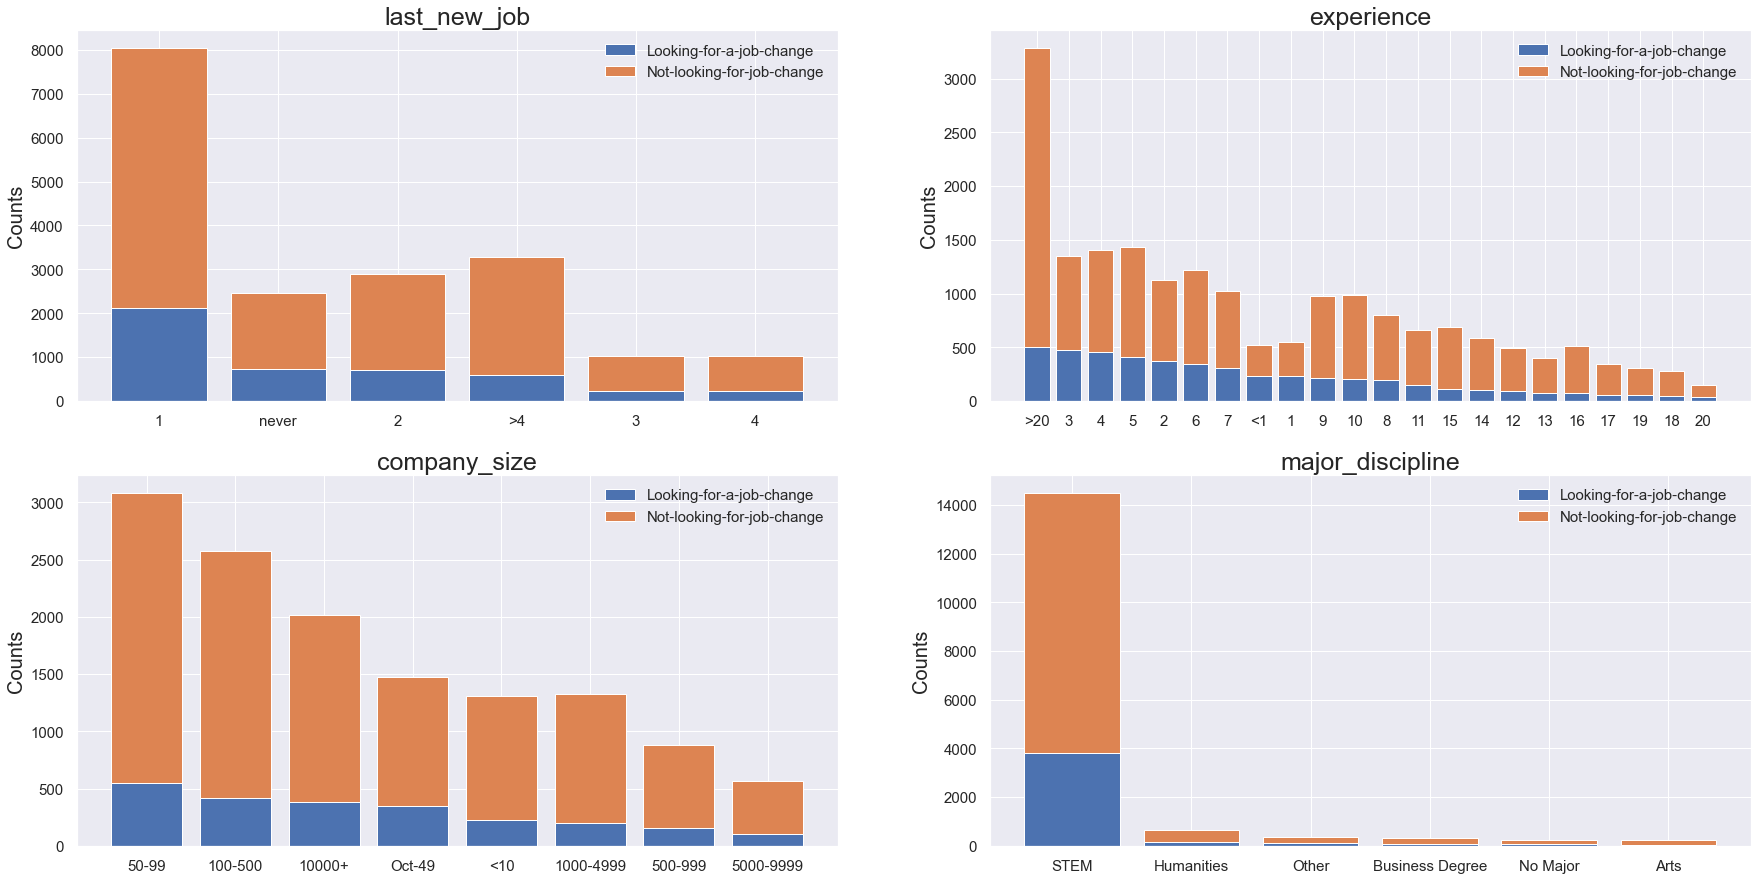

In [37]:
# make subplots 2 in columns & 2 in rows
fig, axes = plt.subplots(nrows = 2, ncols = 2)


# make the data read to feed into the visulizer
yes_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==1]['last_new_job'].value_counts()
no_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==0]['last_new_job'].value_counts()
no_change = no_change.reindex(index = yes_change.index)


# make the bar plot
p1 = axes[0, 0].bar(yes_change.index, yes_change.values)
p2 = axes[0, 0].bar(no_change.index, no_change.values, bottom=yes_change.values)
axes[0, 0].set_title('last_new_job', fontsize=25) #set the x label with the fontsize
axes[0, 0].set_ylabel('Counts', fontsize=20) #set the y label with the fontsize
axes[0, 0].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
axes[0, 0].legend((p1[0], p2[0]), ('Looking-for-a-job-change', 'Not-looking-for-job-change'), fontsize = 15)  #set the legend 

# make the data read to feed into the visualizer
rel_ex_yes_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==1]['experience'].value_counts()
rel_ex_no_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==0]['experience'].value_counts()
rel_ex_no_change = rel_ex_no_change.reindex(index = rel_ex_yes_change.index)

#make the bar plot
p3 = axes[0, 1].bar(rel_ex_yes_change.index, rel_ex_yes_change.values)
p4 = axes[0, 1].bar(rel_ex_no_change.index, rel_ex_no_change.values, bottom=rel_ex_yes_change.values)
axes[0, 1].set_title('experience', fontsize=25) #set the x label with the fontsize
axes[0, 1].set_ylabel('Counts', fontsize=20) #set the y label with the fontsize
axes[0, 1].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
axes[0, 1].legend((p3[0], p4[0]), ('Looking-for-a-job-change', 'Not-looking-for-job-change'), fontsize = 15) #set the legend 


# make the data read to feed into the visualizer
edu_level_yes_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==1]['company_size'].value_counts()
edu_level_no_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==0]['company_size'].value_counts()
edu_level_no_change = edu_level_no_change.reindex(index = edu_level_yes_change.index)

#make the bar plot
p5 = axes[1, 0].bar(edu_level_yes_change.index, edu_level_yes_change.values)
p6 = axes[1, 0].bar(edu_level_no_change.index, edu_level_no_change.values, bottom=edu_level_yes_change.values)
axes[1, 0].set_title('company_size', fontsize=25) #set the x label with the fontsize
axes[1, 0].set_ylabel('Counts', fontsize=20) #set the y label with the fontsize
axes[1, 0].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
axes[1, 0].legend((p5[0], p6[0]), ('Looking-for-a-job-change', 'Not-looking-for-job-change'), fontsize = 15) #set the legend


# make the data read to feed into the visualizer
uni_yes_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==1]['major_discipline'].value_counts()
uni_no_change = data.replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})[data['target']==0]['major_discipline'].value_counts()
uni_no_change = uni_no_change.reindex(index = uni_yes_change.index)

#make the bar plot
p7 = axes[1, 1].bar(uni_yes_change.index, uni_yes_change.values)
p8 = axes[1, 1].bar(uni_no_change.index, uni_no_change.values, bottom=uni_yes_change.values)
axes[1, 1].set_title('major_discipline', fontsize=25) #set the x label with the fontsize
axes[1, 1].set_ylabel('Counts', fontsize=20) #set the y label with the fontsize
axes[1, 1].tick_params(axis='both', labelsize=15) #set the tick parameters for both axis and set the label size
axes[1, 1].legend((p7[0], p8[0]), ('Looking-for-a-job-change', 'Not-looking-for-job-change'), fontsize = 15) #set the legend 



plt.show()  #show the plot

In [16]:
#remove irrelvant and unneeded features
#load libraries

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

target    1.0
Name: target, dtype: float64

In [17]:
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [550]:
#ORIGINAL CASE STUDY PART 2#check if there is any missing values
data.isnull().values.any()

True

In [551]:
#Drop NaNs
data.dropna()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Oct-49,Funded Startup,1,25,0


In [552]:
#check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (19158, 14)


In [553]:
#check the data types
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [554]:
#start converting some of the colums to intiger
#convert city_development to intiger
data['city_development_index'] = data['city_development_index'].astype(str)

In [555]:
#split city to city1 & city number
data[['city1','city_number']] = data.city.str.split("_",expand=True) 

In [556]:
#Removing irrelevent features 'city', 'city1'
list_drop = ['city', 'city1']
data.drop(list_drop, axis=1, inplace=True)

In [557]:
data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_number
0,8949,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1,103
1,29725,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0,21
3,33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1,115
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,162


In [558]:
#convert city_number to intiger
data['city_number'] = data['city_number'].astype(int)

In [559]:
#remove 'never' and 'unknown' labels in the last_new_job column.
data["last_new_job"]= data["last_new_job"].replace('never', 0)
data["last_new_job"]= data["last_new_job"].replace('Unknown', 0)

In [560]:
#check data types again
data.dtypes

enrollee_id                int64
city_development_index    object
gender                    object
relevent_experience       object
enrolled_university       object
education_level           object
major_discipline          object
experience                object
company_size              object
company_type              object
last_new_job              object
training_hours             int64
target                     int64
city_number                int64
dtype: object

In [561]:
# checking the percentage of missing values in each variable
data.isnull().sum()/len(data)*100

enrollee_id                0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
city_number                0.000000
dtype: float64

In [562]:
# fill enrolled university with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('no_enrollment', inplace=inplace)

In [563]:
#fill in with the most enrolled_university
fill_na_most(data['enrolled_university'])
# check the result
print(data['enrolled_university'].describe())

count             19158
unique                3
top       no_enrollment
freq              14203
Name: enrolled_university, dtype: object


In [564]:
# fill gender with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('Male', inplace=inplace)

In [565]:
#fill in with the most gender
fill_na_most(data['gender'])
# check the result
print(data['gender'].describe())

count     19158
unique        3
top        Male
freq      17729
Name: gender, dtype: object


In [566]:
# fill experience with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('20', inplace=inplace)
#fill in with the most gender
fill_na_most(data['experience'])
# check the result
print(data['experience'].describe())

count     19158
unique       22
top         >20
freq       3286
Name: experience, dtype: object


In [567]:
#convert experience to string
data['experience'] = data['experience'].astype(str)

In [568]:
# fill education_level with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('Graduate', inplace=inplace)

In [569]:
# fill education_level with the most represented value
fill_na_most(data['education_level'])

In [570]:
# fill major_discipline with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('STEM', inplace=inplace)

In [571]:
# fill education_level with the most represented value
fill_na_most(data['major_discipline'])

In [572]:
# checking the percentage of missing values in each variable
data.isnull().sum()/len(data)*100

enrollee_id                0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline           0.000000
experience                 0.000000
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
city_number                0.000000
dtype: float64

In [573]:
data.head(20)

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_number
0,8949,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1,103
1,29725,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0,21
3,33241,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1,115
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,162
5,21651,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1,176
6,28806,0.92,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0,160
7,402,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,46
8,27107,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,103
9,699,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0,103


In [574]:
#Fill in the remaining missing value as "Unknown"
data.fillna('Unknown', inplace = True)
for column in data:
    print(column)
    print(data[column].isnull().sum().sum())

enrollee_id
0
city_development_index
0
gender
0
relevent_experience
0
enrolled_university
0
education_level
0
major_discipline
0
experience
0
company_size
0
company_type
0
last_new_job
0
training_hours
0
target
0
city_number
0


In [575]:
data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_number
0,8949,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Unknown,Unknown,1,36,1,103
1,29725,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Unknown,Unknown,0,83,0,21
3,33241,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,Unknown,Pvt Ltd,0,52,1,115
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,162


In [576]:
# checking the percentage of missing values in each variable, NO MISSING VALUES NOW
data.isnull().sum()/len(data)*100

enrollee_id               0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
city_number               0.0
dtype: float64

In [577]:
#delete the '<,>' symbols in front of "experience" & "last new job"
data['experience'] = data['experience'].map(lambda x: x.lstrip('<>'))

In [599]:
data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_number
0,8949,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Unknown_size,Unknown_type,1,36,1,103
1,29725,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Unknown_size,Unknown_type,0,83,0,21
3,33241,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,Unknown_size,Pvt Ltd,0,52,1,115
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0,162


In [579]:
#check data types again
data.dtypes

enrollee_id                int64
city_development_index    object
gender                    object
relevent_experience       object
enrolled_university       object
education_level           object
major_discipline          object
experience                object
company_size              object
company_type              object
last_new_job              object
training_hours             int64
target                     int64
city_number                int64
dtype: object

In [580]:
#make the unknown features littl ebit more clear
data["company_size"]= data["company_size"].replace('Unknown', 'Unknown_size')
data["company_type"]= data["company_type"].replace('Unknown', 'Unknown_type')

In [600]:
data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_number
0,8949,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Unknown_size,Unknown_type,1,36,1,103
1,29725,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Unknown_size,Unknown_type,0,83,0,21
3,33241,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,Unknown_size,Pvt Ltd,0,52,1,115
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0,162


In [582]:
#ORIGINAL CASE STUYY - PART 3

#convert categorical data to numbers
#get the categorical data
cat_features = ['gender', 'relevent_experience', "enrolled_university", "education_level", 'major_discipline']
data_cat = data[cat_features]

In [583]:
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

In [584]:
# check the data
print(data_cat_dummies.head(8))

   gender_Female  gender_Male  gender_Other  \
0              0            1             0   
1              0            1             0   
2              0            1             0   
3              0            1             0   
4              0            1             0   
5              0            1             0   
6              0            1             0   
7              0            1             0   

   relevent_experience_Has relevent experience  \
0                                            1   
1                                            0   
2                                            0   
3                                            0   
4                                            1   
5                                            1   
6                                            1   
7                                            1   

   relevent_experience_No relevent experience  \
0                                           0   
1                          

In [585]:
#Split your data into two sets: training & validation
#create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['city_number', 'experience', 'training_hours']

In [586]:
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)
data_model_X

,city_number,experience,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,...,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,103,20,36,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,40,15,47,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,21,5,83,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,115,1,52,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,162,20,8,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,14,42,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
19154,103,14,52,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19155,103,20,44,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19156,65,1,97,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [587]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data['target'].replace({'target': {1: 'Looking-for-a-job-change', 0: 'Not-looking-for-job-change'}})
data_model_y

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int64

In [588]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

In [589]:
# split the data using 70:30 ratio
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [590]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  13410
No. of samples in validation set: 5748


In [591]:
# Count the 'Looking-for-a-job-change' and 'Not-looking-for-a-job-change'in the training set
print('\n')
print('No. of people looking for a job change and not looking for a job change  in the training set:')
print(y_train.value_counts())



No. of people looking for a job change and not looking for a job change  in the training set:
0    10064
1     3346
Name: target, dtype: int64


In [592]:
# Count the 'Looking-for-a-job-change' and 'Not-looking-for-a-job-change'in the validation set
print('\n')
print('No. of people looking for a job change and not looking for a job change  in the training set:')
print(y_val.value_counts())



No. of people looking for a job change and not looking for a job change  in the training set:
0    4317
1    1431
Name: target, dtype: int64


In [615]:
#Evaluation Metrics: confusion metric, precision, recall & F1 score, ROC curve
#import all the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC


In [616]:
# Instantiate the classification model 
model = LogisticRegression()

/Users/Chimpukh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


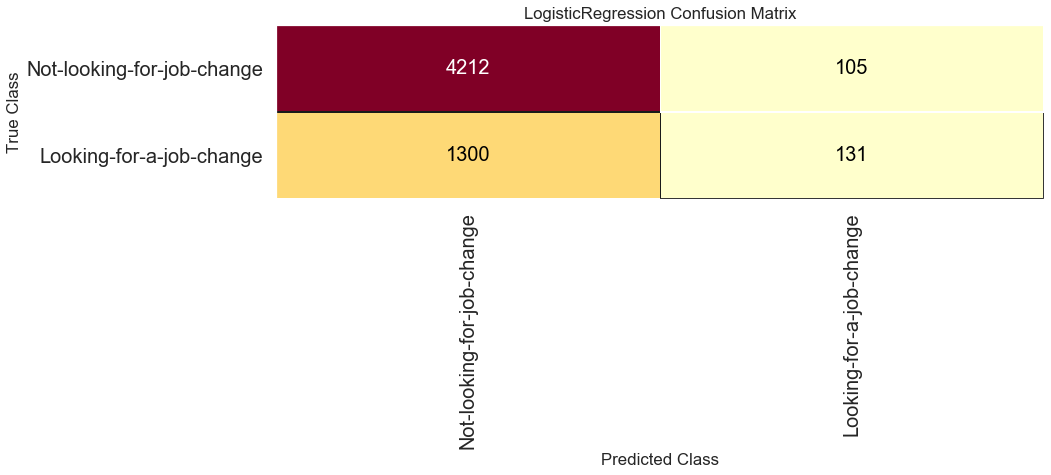

In [617]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Not-looking-for-job-change','Looking-for-a-job-change']
cm = ConfusionMatrix(model, classes=classes, percent=False)
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)
# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    #How did we do?
cm.poof()

In [618]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

/Users/Chimpukh/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


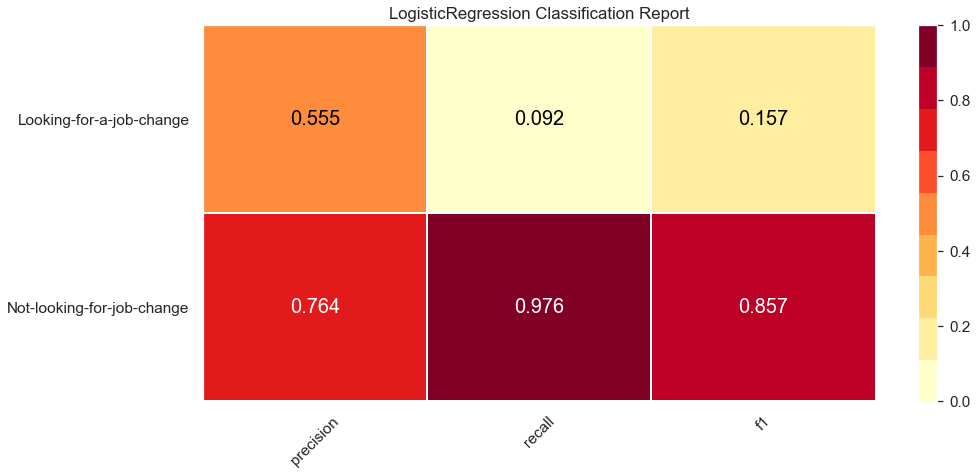

In [619]:
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

/Users/Chimpukh/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


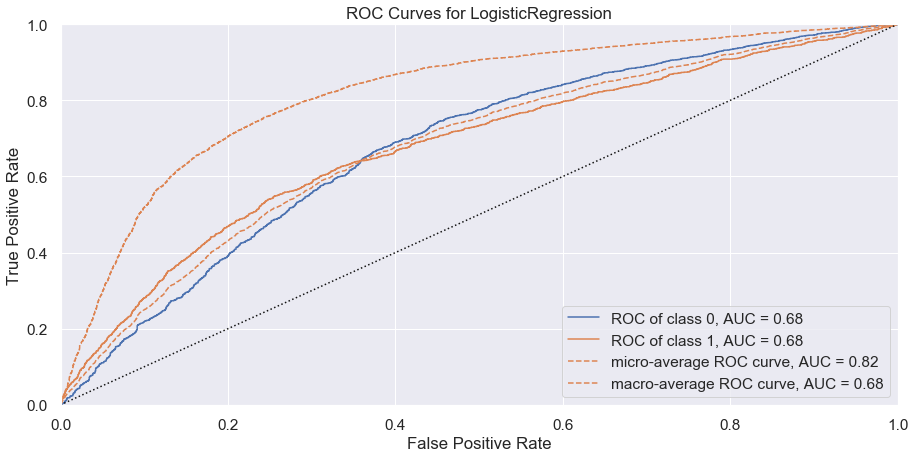

In [620]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [621]:
#decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
prediction_dt = tree.predict(X_val)
print(classification_report(y_val, prediction_dt))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      4317
           1       0.36      0.35      0.36      1431

    accuracy                           0.69      5748
   macro avg       0.58      0.57      0.58      5748
weighted avg       0.68      0.69      0.68      5748



In [623]:
#random forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
prediction_rf = forest.predict(X_val)
print(classification_report(y_val, prediction_rf))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      4317
           1       0.48      0.32      0.38      1431

    accuracy                           0.74      5748
   macro avg       0.64      0.60      0.61      5748
weighted avg       0.72      0.74      0.73      5748

